In [19]:
import os
import numpy as np
from pdf2image import convert_from_path
from PIL import Image

from decimer_segmentation import (
    segment_chemical_structures,
    segment_chemical_structures_from_file,
)

## Define pdf path and convert to image

Please uncomment according to the system you are using. 
If you are using Windows, make sure, poppler is installed properly.
On Linux and MacOS, this should work properly without any problems. 

#### Uncomment below according to your needs. 

In [20]:
from pathlib import Path
from PyPDF2 import PdfWriter, PdfReader

def pdf_extract(pdf, segments, together=False):
    """
    pdf: str | Path
    segments: [(start, end), {'start': int, 'end': int}]
    """
    pdf_writer = PdfWriter()
    with open(pdf, 'rb') as read_stream:
        pdf_reader = PdfReader(read_stream)
        pdf_writer_segment = PdfWriter()
        for segment in segments:
            # support {'start': 3, 'end': 3} or (start, end)
            try:
                start_page, end_page = segment['start'], segment['end']
            except TypeError:
                start_page, end_page = segment
            for page_num in range(start_page - 1, end_page):
                if together:
                    pdf_writer.add_page(pdf_reader.pages[page_num])
                else:
                    pdf_writer_segment.add_page(pdf_reader.pages[page_num])
            p = Path(pdf)
            if not together:
                ouput = p.parent / p.with_stem(f'{p.stem}_pages_{start_page}-{end_page}')
                with open(ouput, 'wb') as out:
                    pdf_writer_segment.write(out)
    if together:
        ouput = p.parent / p.with_stem(f'{p.stem}_extracted')
        with open(ouput, 'wb') as out:
            pdf_writer.write(out)
            

In [36]:
#path: str = os.path.abspath("./Validation/TW215080B.pdf")
#path: str = os.path.abspath("testpull/test_pdfs/1498383555865983980-08507653 - US8507653.pdf")
pdf_extract(path, [(0, 24)])

In [43]:
#path: str = os.path.abspath("./Validation/test_page.pdf")
#path: str = os.path.abspath("./Validation/page 35.pdf")
#path: str = os.path.abspath("./Validation/TW215080B_pages_45-55.pdf")

# page 5
#path: str = os.path.abspath(r"testpull\test_pdfs\1498395631838999062-07883693.pdf")

# page 8, 12, 17, 24
path: str = os.path.abspath(r"testpull\test_pdfs\1498378700716837495-09308273 - US9308273.pdf")

# page 10, 12, 21, 24
#path: str = os.path.abspath(r"testpull\test_pdfs\1498383555865983980-08507653 - US8507653.pdf")


# If you are using Windows, make sure to have poppler installed and show pdf2image where to find it.
poppler_path = r'C:\Users\Evan\poppler-24.02.0\Library\bin'  

In [44]:
pages = convert_from_path(path, 150, poppler_path=poppler_path)

# If you are using Linux or MacOS, this should hopefully have been installed via conda/pip.
# In that case, you just run:
# pages = convert_from_path(path, 500)
#pages[0]

## Run the detection using the Mask R CNN model

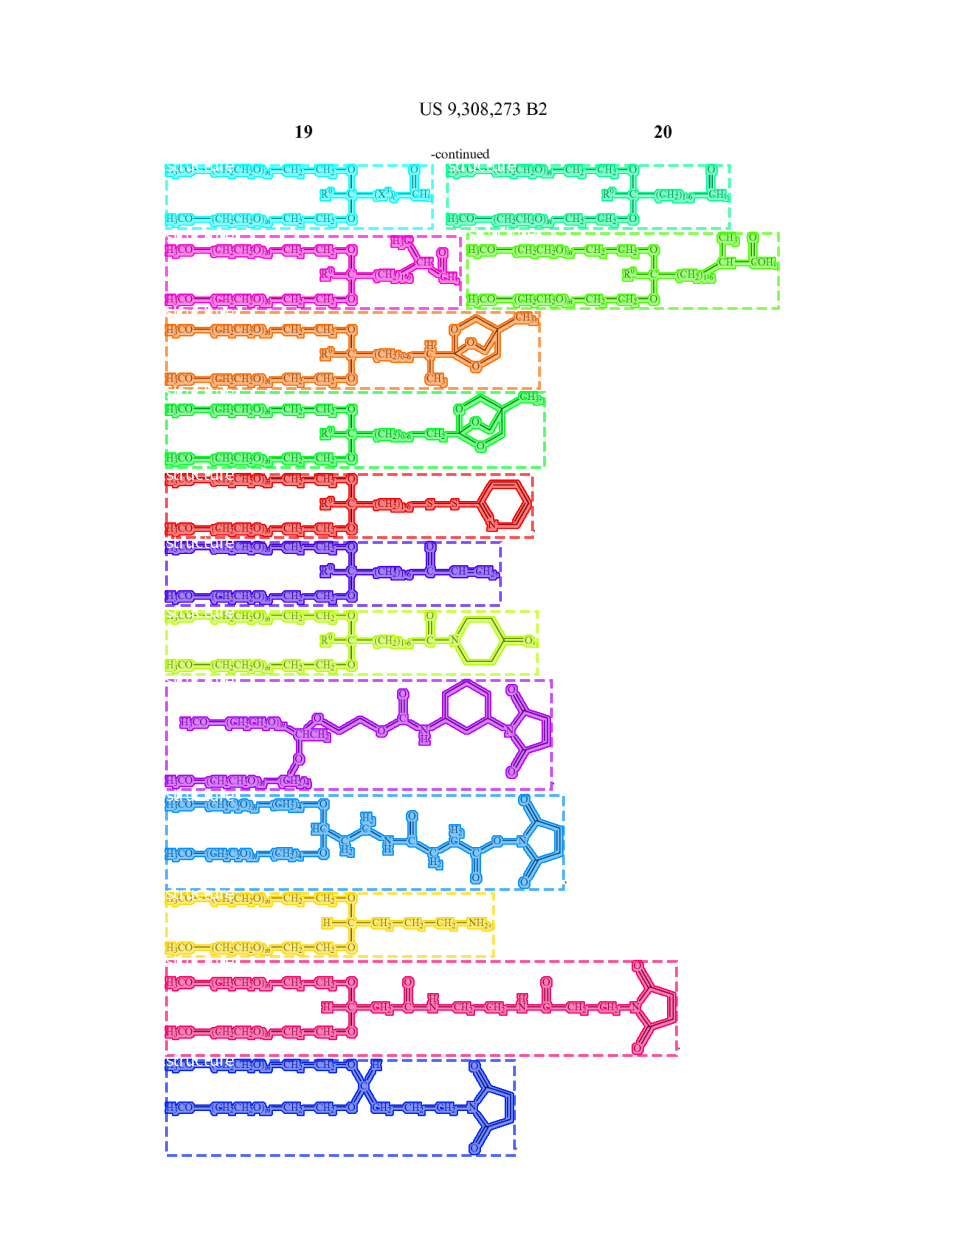

In [46]:
segments = segment_chemical_structures(
    np.array(pages[11]), expand=True, visualization=True
)

## Run DECIMER Segmentation with the mask expansion


In [47]:
#segments = segment_chemical_structures(
#    np.array(pages[2]), expand=True, visualization=True
#)

## Run DECIMER Segmentation directly on a file

If you run it on a pdf_file on Windows, you may need to adapt the poppler_path argument of segment_chemical_structures_from_file. If the poppler installation is not found, it tries to find it at "C:\\Program Files (x86)\\poppler-0.68.0\\bin". If you have installed poppler elsewhere, please adapt the path.

In [4]:
from PIL import Image
import io
import os
import time
import pandas as pd
from pypdf import PdfReader

In [5]:
cols = ["Model Type", "File Name", "Mask_expand", "Pages", "Images", "Exec Time"]
df_model_stats = pd.DataFrame(columns=cols)

In [9]:
pull_path = "testpull/test_pdfs/"
dest_path = "testpull/decimer/"
expand_mask = False
model_type = "Full"

In [10]:
for root, dirs, files in os.walk(pull_path):
    for file in files:
        # get file path
        path = pull_path + file

        # get doc length
        reader = PdfReader(path)
        pages = len(reader.pages)

        # Instatiate time measure
        start_time = time.time()

        # run image segmentation
        segments = segment_chemical_structures_from_file(path, expand=expand_mask, poppler_path=poppler_path)
        exec_time = time.time()-start_time
        
        # Get num images
        num_images = len(segments)
        
        # Record and print results
        df_model_stats.loc[len(df_model_stats.index)] = [model_type, file, expand_mask, pages, num_images, exec_time] 
        print("File: ", file)
        print("Model: ", model_type)
        print("Mask: ", expand_mask)
        print("Pages: ", pages)
        print("No. of images: ", num_images)
        print("Execution time: ", exec_time)
        print("--------------------------")

        # Save images
        save_path = dest_path + "Model" + str(model_type) + "/" + "Mask" + str(expand_mask) + "/"+ file[:-4]
        os.makedirs(save_path, exist_ok=True)

        for i in range(len(segments)):
            im = Image.fromarray(segments[i])
            im.save(save_path + "/" + str(i) + ".png")


File:  1498378700716837495-09308273 - US9308273.pdf
Model:  Full
Mask:  False
Pages:  25
No. of images:  119
Execution time:  63.723830699920654
--------------------------
File:  1498383555865983980-08507653 - US8507653.pdf
Model:  Full
Mask:  False
Pages:  25
No. of images:  51
Execution time:  52.03735852241516
--------------------------
File:  1498392494248982643-08003742 - US8003742.pdf
Model:  Full
Mask:  False
Pages:  8
No. of images:  5
Execution time:  18.892216682434082
--------------------------
File:  1498395631838999062-07883693.pdf
Model:  Full
Mask:  False
Pages:  41
No. of images:  31
Execution time:  74.99904775619507
--------------------------
File:  1498396149789737288-08304511 - US8304511.pdf
Model:  Full
Mask:  False
Pages:  25
No. of images:  45
Execution time:  50.924638509750366
--------------------------
File:  CN107200838A.pdf
Model:  Full
Mask:  False
Pages:  50
No. of images:  386
Execution time:  152.0844762325287
--------------------------
File:  CN10757349

In [11]:
df_model_stats

,Model Type,File Name,Mask_expand,Pages,Images,Exec Time
0,Full,1498378700716837495-09308273 - US9308273.pdf,True,25,117,105.728949
1,Full,1498383555865983980-08507653 - US8507653.pdf,True,25,51,76.601060
2,Full,1498392494248982643-08003742 - US8003742.pdf,True,8,5,21.958534
3,Full,1498395631838999062-07883693.pdf,True,41,31,86.461412
4,Full,1498396149789737288-08304511 - US8304511.pdf,True,25,44,66.456558
5,Full,CN107200838A.pdf,True,50,375,254.488988
6,Full,CN107573498A.pdf,True,41,91,115.765665
7,Full,EP2442839B1.pdf,True,42,23,78.091242
8,Full,JP5706691B2.pdf,True,29,30,61.213255
9,Full,KR101793704B1.pdf,True,29,22,60.769870


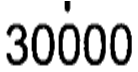

In [163]:
Image.fromarray(segments[1])